<h1 align="center"><b>Modelación Financiera I</b></h1>
<h1 align="center"><b> Módulo 6 </b></h1>
<h1 align="center"><b> Series de tiempo  </b></h1>

*** 

***Docente:*** Santiago Rúa Pérez, PhD.

***e-mail:*** srua@udemedellin.edu.co

***Herramienta:*** [Jupyter Notebook](http://jupyter.org/)

***Kernel:*** Python 3.7

***MEDELLÍN - COLOMBIA***

***2022***

***

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Trabajando-con-series-de-tiempo" data-toc-modified-id="Trabajando-con-series-de-tiempo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Trabajando con series de tiempo</a></span></li>
    <li><span><a href="#Fechas-y-tiempos-nativos-de-Python" data-toc-modified-id="Fechas-y-tiempos-nativos-de-Python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fechas y tiempos nativos de Python</a></span></li>
    <li><span><a href="#Estructura-de-series-de-tiempo-con-Pandas" data-toc-modified-id="Estructura-de-series-de-tiempo-con-Pandas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Estructura de series de tiempo con Pandas</a></span></li>
    <li><span><a href="#Remuestreo,-desplazamiento-y-creaci%C3%B3n-de-ventanas" data-toc-modified-id="Remuestreo,-desplazamiento-y-creaci%C3%B3n-de-ventanas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remuestreo, desplazamiento y creación de ventanas</a></span></li>
    <li><span><a href="#Ventanas-m%C3%B3viles" data-toc-modified-id="Ventanas-m%C3%B3viles-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ventanas móviles</a></span></li>
    <li><span><a href="#Descomponer-series-de-tiempo" data-toc-modified-id="Descomponer-series-de-tiempo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Descomponer series de tiempo</a></span></li>
    <li><span><a href="#Usar-y-remover-tendencias" data-toc-modified-id="Usar-y-remover-tendencias-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Usar y remover tendencias</a></span></li>
    <li><span><a href="#Usar-y-remover-estacionalidad" data-toc-modified-id="Usar-y-remover-estacionalidad-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Usar y remover estacionalidad</a></span></li>
    <li><span><a href="#Estacionaridad-en-series-de-tiempo" data-toc-modified-id="Estacionaridad-en-series-de-tiempo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Estacionaridad en series de tiempo</a></span></li>
    <li><span><a href="#Algunos-conceptos-antes-de-hacer-pron%C3%B3sticos" data-toc-modified-id="Algunos-conceptos-antes-de-hacer-pron%C3%B3sticos-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Algunos conceptos antes de hacer pronósticos</a></span></li>
    <li><span><a href="#M%C3%A9todos-de-Box-Jenkins" data-toc-modified-id="M%C3%A9todos-de-Box-Jenkins-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Métodos de Box Jenkins</a></span></li>
    <li><span><a href="#Laboratorio" data-toc-modified-id="Laboratorio-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Laboratorio</a></span></li>
    </ul></div>

In [1]:
%matplotlib inline

## Trabajando con series de tiempo

Pandas fue desarrollado en el contexto de modelación financiera, por lo anterior tiene un conjunto extenso de herramientas para trabajar con fechas, tiempo, y datos indexados con tiempo. Fechas y datos de tiempo vienen con las siguientes características:

- Las etiquetas de tiempo referencia momentos particulares, ejemplo: July 4th, 2015 at 7:00am
- Periodos e intervalos de tiempo hacen referencia a longitudes que tienen inicio y final, por ejemplo: año 2015
- Deltas de tiempo hacen referencia a longitud exacta, ejemplo: 22.5 segundos. 

## Fechas y tiempos nativos de Python

El objeto o clase por defecto para trabajar con fechas en python es el modulo interno de `datetime`. 

In [2]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
date.strftime('%A')

'Saturday'

En la última línea, se uso el formato estándar de salida para imprimir fechas, el cual puede leer más información en [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

La potencia de estas librerias está en su fácil uso y flexibilidad en su sintaxis. Donde fallan es cuando se requiere trabajar con listado grande de fechas y tiempo

### Fechas y tiempo en Pandas

Pandas esta construido sobre estas herramientas y crea un objeto propio llamado `Timestamp`, el cual combina las librerias antes vistas con el manejo eficiente vectorizado. Pandas entonces es capaz de construir in indice tipo `DatetimeIndex` el cual puede ser usado tanto en series como en dataframe

In [5]:
import pandas as pd
import numpy as np
date = pd.to_datetime("25th of July, 2015")
date

Timestamp('2015-07-25 00:00:00')

In [6]:
date.strftime('%A')

'Saturday'

In [7]:
date + pd.to_timedelta(np.arange(12), 'D') 

DatetimeIndex(['2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31', '2015-08-01',
               '2015-08-02', '2015-08-03', '2015-08-04', '2015-08-05'],
              dtype='datetime64[ns]', freq=None)

Entonces, como podemos realizar indexación de un objeto tipo serie o dataframe teniendo en cuenta el tiempo?

El primer paso es crear el objeto tipo `DatetimeIndex` y crear dicha serie o dataframe con el index

In [8]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [9]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [10]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Estructura de series de tiempo con Pandas

A continuación se hablará de las estructuras de datos fundamentales de Pandas para trabajar con series de tiempo

- Para *time stamps*, Pandas introduce el tipo `Timestamp`. Es un remplazo de la libreria nativa de Python `datetime`, pero mas eficiente. La estructura para el indice está dada por `DatetimeIndex`
- Para *time Periods*, Pandas introduce el tipo `Period`. Este codifica un intervalo fijo y cuya estructura para el indice está dado por `PeriodIndex`.
- Para *time deltas* o *durations*, Pandas introduce el tipo `Timedelta`. Este es una forma más eficiente de la libreria nativa `datetime.timedelta` y su estructura de indice está dado por `TimedeltaIndex`


In [11]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [12]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [13]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

Para la creación de estas fechas, Pandas nos ofrece un conjunto de funciones los cuales pueden ser usados de la siguiente forma: `pd.date_range()` para timestamps, `pd.period_range()` para periodos, y `pd.timedelta_range()` para deltas

In [14]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [15]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [16]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [17]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [18]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Es importante entender la notación para los códigos de los calendarios

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |


| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

In [19]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

## Remuestreo, desplazamiento y creación de ventanas

La capacidad de usar fechas y horas como índices para organizar y acceder de manera intuitiva a los datos es una pieza importante de las herramientas de series temporales de Pandas. Los beneficios de los datos indexados en general (alineación automática durante las operaciones, división y acceso intuitivo de datos, etc.) aún se aplican, y Pandas proporciona varias operaciones adicionales específicas de series temporales.

Para ver esto, se usará algunos datos de precios de acciones como ejemplo. Debido a que Pandas se desarrolló principalmente en un contexto financiero, incluye algunas herramientas muy específicas para datos financieros. Por ejemplo, el paquete `pandas-datareader` que lo acompaña (instalable a través de `conda install pandas-datareader`), sabe cómo importar datos financieros de varias fuentes disponibles, incluidas Yahoo Finance, Quandl, Tiingo y otras. Aquí cargaremos el historial de precios de cierre de Google:

In [20]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [21]:
goog = goog['Close']

In [22]:
goog.size

2863

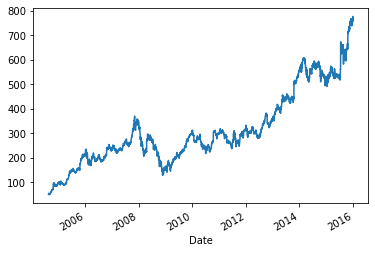

In [23]:
import matplotlib.pyplot as plt
goog.plot();

Una necesidad común de datos de series temporales es volver a muestrear a una frecuencia más alta o más baja. Esto se puede hacer usando el método `resample()`, o el método mucho más simple `asfreq()`. La principal diferencia entre los dos es que `resample()` es fundamentalmente una agregación de datos, mientras que `asfreq()` es fundamentalmente una selección de datos.

Echando un vistazo al precio de cierre de Google:



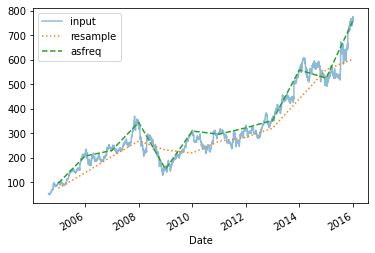

In [24]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [25]:
a = goog.resample('BA').mean()
print(a)
b = goog.asfreq('BA')
print(b)
print(goog.loc['2004-12-31'])

Date
2004-12-31     75.617206
2005-12-30    138.360933
2006-12-29    204.824916
2007-12-31    268.369305
2008-12-31    231.558071
2009-12-31    219.023214
2010-12-31    266.811472
2011-12-30    283.424738
2012-12-31    320.208021
2013-12-31    440.470378
2014-12-31    559.803290
2015-12-31    602.005681
2016-12-30           NaN
Freq: BA-DEC, Name: Close, dtype: float64
Date
2004-12-31     96.035034
2005-12-30    206.655411
2006-12-29    229.380234
2007-12-31    344.448914
2008-12-31    153.250580
2009-12-31    308.832428
2010-12-31    295.875977
2011-12-30    321.744019
2012-12-31    352.369232
2013-12-31    558.262512
2014-12-31    524.958740
2015-12-31    758.880005
Freq: BA-DEC, Name: Close, dtype: float64
96.0350341796875


Otra operación común específica de series de tiempo es el desplazamiento de datos en el tiempo. Pandas tiene dos métodos estrechamente relacionados para calcular esto: `shift()` y `tshift()`. En resumen, la diferencia entre ellos es que `shift()` cambia los datos, mientras que `tshift()` cambia el índice. En ambos casos, el cambio se especifica en múltiplos de la frecuencia.

Aquí haremos `shift()` y `tshift()` por 900 días

/tmp/ipykernel_27107/3867286265.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    53.952770
2004-08-22    53.952770
2004-08-23    54.495735
Freq: D, Name: Close, dtype: float64

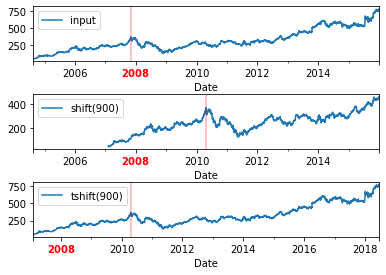

In [26]:
fig, ax = plt.subplots(3)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.6)

goog.head()

Tipicamente este tipo de operaciones se utiliza para realizar diferencia o diferenciación en el tiempo. Por ejemplo, se puede usar los valores desplazados para calcular el retorno de la inversión de la acción de Google en un año.

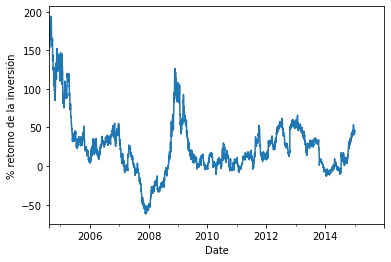

In [27]:
ROI = 100 * (goog.shift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% retorno de la inversión');

## Ventanas móviles

Pandas posibilita realizar implementaciones de ventanas moviles a series temporales en sus datos. Esto se puede lograr a través del atributo `rolling()` de los objetos `Series` y `DataFrame`, que devuelve una vista similar a la que vimos con la operación groupby. Esta vista continua pone a disposición una serie de operaciones de agregación de forma predeterminada.

Por ejemplo, aquí está la media móvil centrada en un año y la desviación estándar de los precios de las acciones de Google:

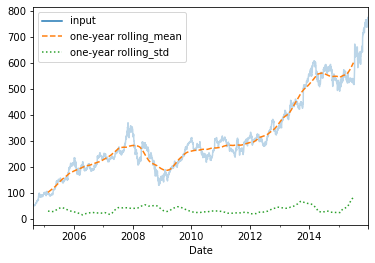

In [28]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

Si desea conocer mas sobre este tema, consulte la página directa de Pandas ["Time Series/Date" section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

## Descomponer series de tiempo

La descomposición de series de tiempo implica pensar en una serie como una combinación de nivel (level), tendencia (trend), estacionalidad (seasonality), y componentes de ruido (noise). La descomposición proporciona un modelo abstracto útil para pensar en las series de tiempo de forma general y para comprender mejor los problemas durante el análisis y pronóstico de series de tiempo.

- **Nivel**: el promedio de los valores en la serie
- **Tendencia**: el incremento o decremento en la serie
- **Estacionalidad**: el ciclo de repetición de ciclo corto en la serie
- **Ruido**: variaciones aleatorias

Existen dos formas de caracterizar la señal, como un modelo aditivo o como un modelo multiplicativo

Para analizar estas caracteristicas, utilizaremos la libreria `statsmodel` y usaremos de nuevo la acción de Google

In [29]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


Text(0, 0.5, 'Resid')

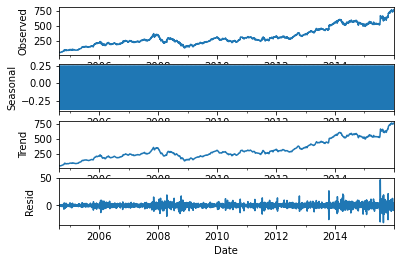

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
# seasonla decompose need freq
CloseStockGoogle = goog['Close'].asfreq('D', method='pad')
result = seasonal_decompose(CloseStockGoogle, model='additive')

fig, ax = plt.subplots(4)

result.observed.plot(ax=ax[0])
result.seasonal.plot(ax=ax[1])
result.trend.plot(ax=ax[2])
result.resid.plot(ax=ax[3])

ax[0].set_ylabel("Observed")

ax[1].set_ylabel("Seasonal")

ax[2].set_ylabel("Trend")

ax[3].set_ylabel("Resid")

Se puede observar de esa gráfica que la tendencia del cierre de la acción es de crecimiento, mientras que no presenta estacionalidad. Vamos a generar una señal aleatoria para mirar todos los comportamientos

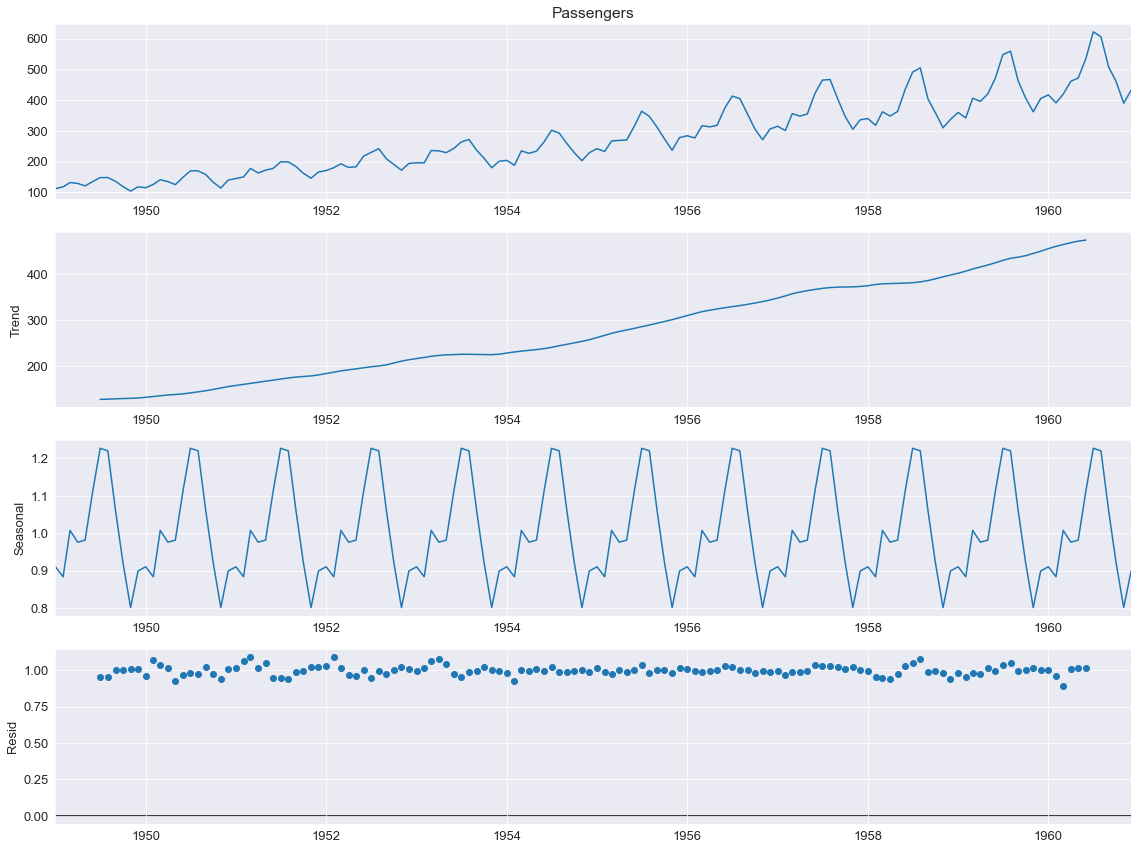

In [62]:
# multiplicative decompose time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('./data/airline-passengers.csv', 
                  header = 0, 
                  index_col = 0, 
                  parse_dates = True).squeeze("columns")
result = seasonal_decompose(series, model='multiplicativ')
result.plot()
pyplot.show()

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

## Usar y remover tendencias

Las tendencias no son mas que un incremento o decremento continuo en nuestra series de tiempo. A veces es importante analizarlas o inclusive removerlas de la serie. Desde una definición formal: es un cambio sistemático en la serie de tiempo que no aparece de forma periódica. 

En la práctica identificar una tendencia puede ser dificil ya que en ocasiones puede ser subjetivo. Existen dos formas de remover tendencias: utilizando diferenciación o encontrando un modelo y restarle dicho modelo. 

Solo se analizará utilizando diferenciación. El dataset a utilizar describe el numero de ventas de shampoo sobre un periodo de 3 años. 

In [63]:
# detrend a time series using differencing
import pandas as pd

initYear = 2019

def parser(x):
    year, month = x.split("-")
    year = str(int(year) + initYear - 1)
    return pd.datetime.strptime(year + "-" + month, '%Y-%m')

series = pd.read_csv('./data/shampoo_sales.csv', 
                     header=0, 
                     index_col=0, 
                     parse_dates=True, 
                     date_parser=parser).squeeze("columns")
series.head()

Month
2019-01-01    266.0
2019-02-01    145.9
2019-03-01    183.1
2019-04-01    119.3
2019-05-01    180.3
Name: Sales, dtype: float64

(array([17897., 18017., 18140., 18262., 18383., 18506., 18628., 18748.,
        18871., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

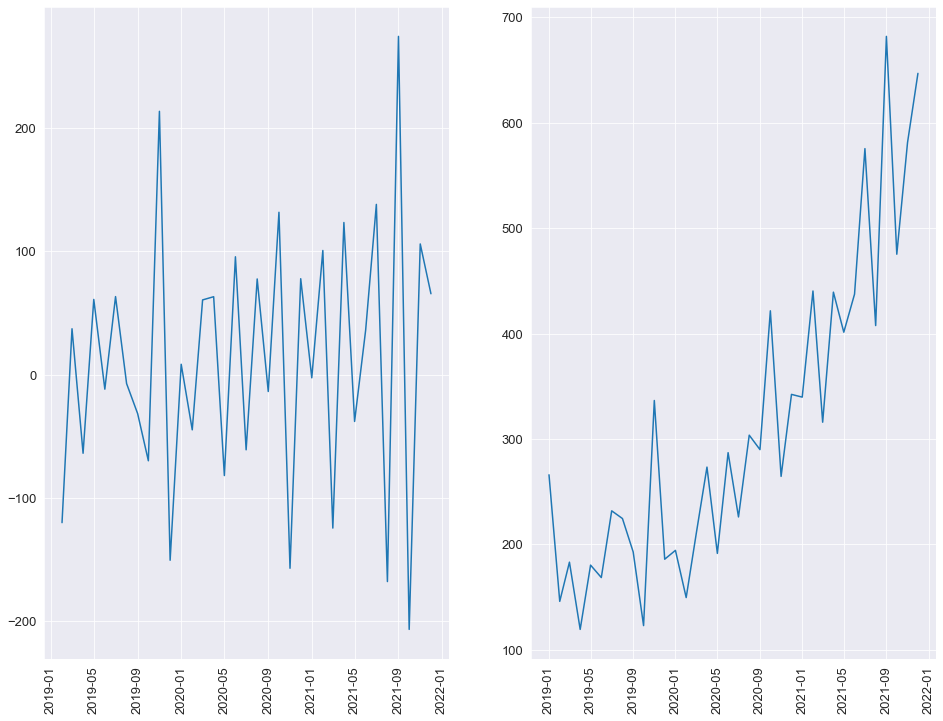

In [34]:
import matplotlib.pyplot as plt

# Crea figura de tamaño 6,6 inches
fig = plt.figure()

ax1 = fig.add_subplot(121)     # Subplot de 1 fila, 2 columnas, Primera columna
plt.plot(series.diff())
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

ax1 = fig.add_subplot(122)     # Subplot de 1 fila, 2 columnas, Primera columna
plt.plot(series)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

## Usar y remover estacionalidad

En el caso contrario, a veces es necesario analizar las tendencias y no la estacionalidad de las series de tiempo. Los ciclos repetitivos pueden esconder información relevante del proceso. Formalmente se define como: un patron repetitivo que se repite cada x periodo de tiempo.

Una serie de tiempo con claro componente de estacionalidad es conocida como no-estacionaria. Remover esta característica dentro de las serie de tiempo se puede utilizar los dos mismo métodos vistos anteriormente. Esta vez usaremos otro dataset que contiene la temperatura diaria minímia en una zona


In [64]:
import pandas as pd

series = pd.read_csv('./data/daily-minimum-temperatures.csv',
                    header = 0,
                    index_col = 0,
                    parse_dates = True).squeeze("columns")
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

Antes de analizar que tipo de estacionalidad tiene la serie de tiempo, es importante que miremos como se comporta

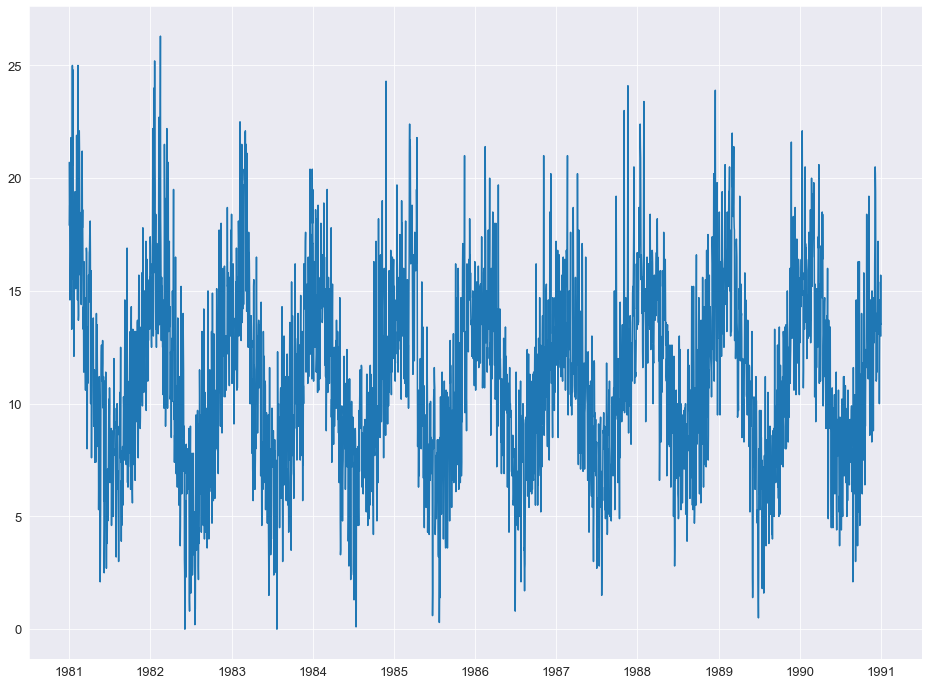

In [36]:
import matplotlib.pyplot as plt

plt.plot(series)

Notese que la grafica parece que tuviera una estacionalidad de mas o menos cada año. Podemos realizar la diferenciación año a año. 

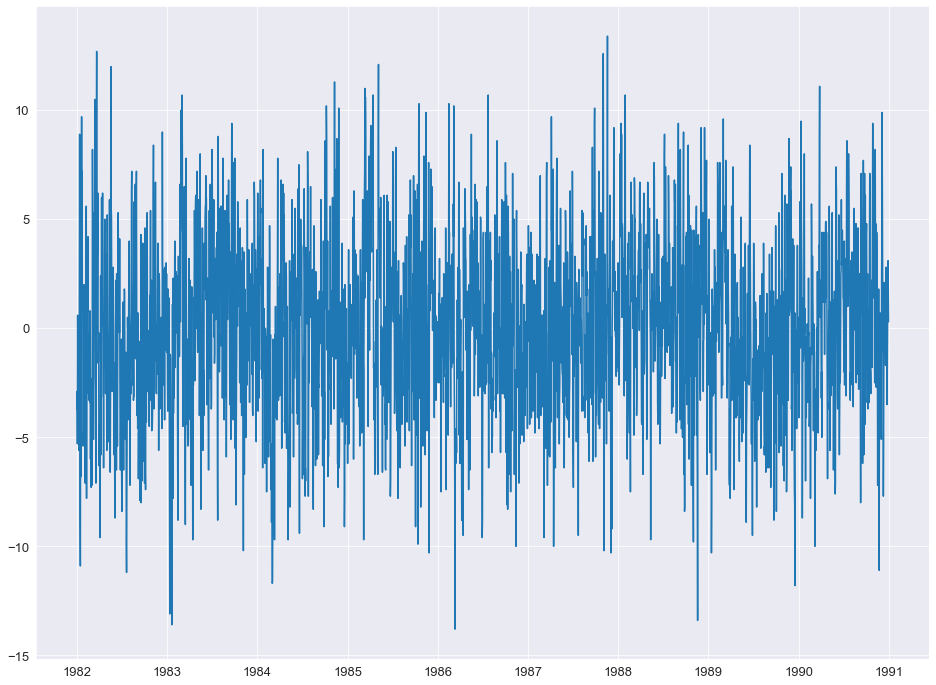

In [37]:
plt.plot(series.diff(periods = 365))

Otra opción que se puede considerar es que la temperatura en un periodo de tiempo fijo se mantengan igual. Por ejemplo, asumamos que la temperatura deberia ser la misma mes a mes

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
Freq: M, Name: Temp, dtype: float64


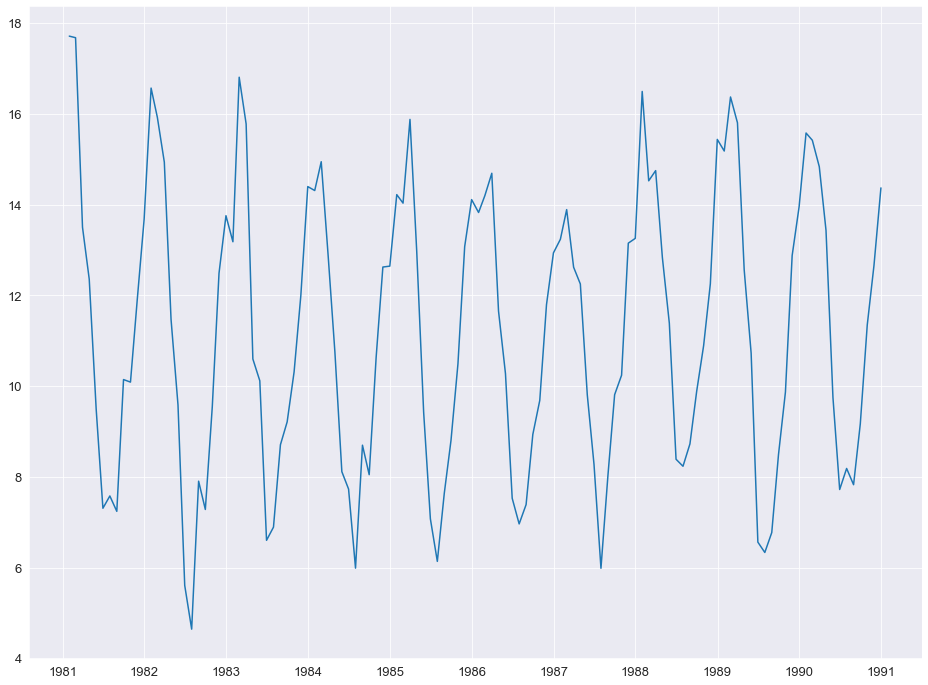

In [38]:
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head())
plt.plot(monthly_mean)

Mediante este método vemos claramente la estacionalidad de la serie de tiempo que se da mes a mes. Ahora si a esta gráfica tratamos de remover la estacionalidad, entonces tenderemos

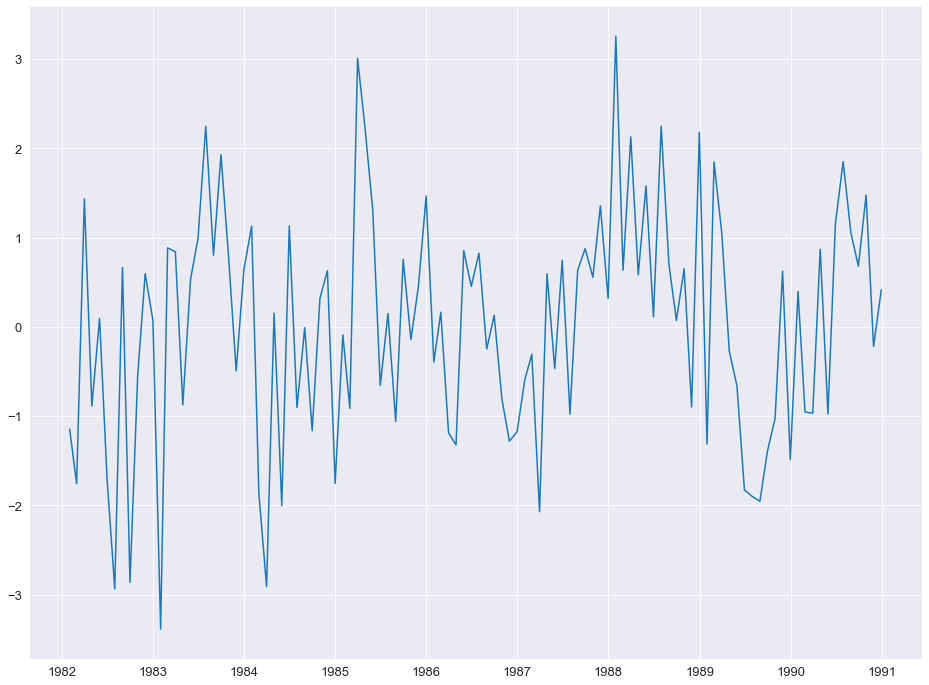

In [39]:
plt.plot(monthly_mean.diff(periods=12))

## Estacionaridad en series de tiempo

Las observaciones en una serie de tiempo estacionaria no son dependientes del tiempo. Lo anterior significa que si obtengo la características estadísticas tales como el promedio o la varianza, serán la misma para cualquier instante de tiempo. Cuando las series son estacionarias, son fáciles de modelar. Generalmente los modelos estadísticos asumen esta condición para ser modelados. 

Una serie de tiempo que muestre efectos estacionales, tendencias u otras estructuras dependiente del tiempo son no estacionarias. El analisis clásico consiste en convertir estas series no estacionarias en estacionarias quitando tendencias, o efecto de estacionalidad. Los métodos para clasificar si es estacionaria o no, se pueden dividir en tres:

- **Gráficas**: se puede realizar un análisis de las gráficas en el tiempo de los datos y visualmente chequear la existencia de tendencia o estacionalidad
- **Estadística descriptiva**: se puede realizar un analisis de las variables estadísticas de la señala realizando particiones aleatorias y chequear diferencias significativas
- **Test estadísticos**: chequear si las espectativas de los test se cumplen


Vamos a realizar el analisis de dos datasets. 

(array([24., 27., 19., 18., 22., 13., 10.,  6.,  3.,  2.]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <BarContainer object of 10 artists>)

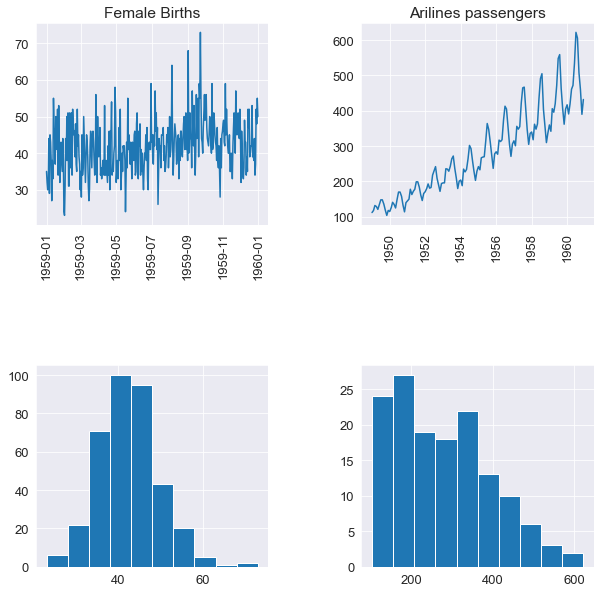

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
series1 = pd.read_csv('./data/daily-total-female-births.csv', 
                     header = 0, 
                     index_col = 0, 
                     parse_dates = True).squeeze("columns")

series2 = pd.read_csv('./data/airline-passengers.csv', 
                     header = 0, 
                     index_col = 0, 
                     parse_dates = True).squeeze("columns")


fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.7, wspace=0.4)

ax1 = fig.add_subplot(221)     # Subplot de 2 fila, 2 columnas, Primera columna
plt.plot(series1)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.title('Female Births')

ax2 = fig.add_subplot(222)     # Subplot de 1 fila, 2 columnas, Primera columna
plt.plot(series2)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.title('Arilines passengers')

ax3 = fig.add_subplot(223)     # Subplot de 1 fila, 2 columnas, Primera columna
plt.hist(series1)

ax4 = fig.add_subplot(224)     # Subplot de 1 fila, 2 columnas, Primera columna
plt.hist(series2)

Notese que estamos buscando la media y la varianza de las señales, por lo que asumimos que la respuesta o histograma deberia ser de forma gaussiana. Notese que la gráfica de la izquierda tiene un comportamiento gaussiano con un poco de cola a la derecha. Sin embargo, la gráfica de la derecha no se ve para nada guassiana. Este tipo de gráfica puede ser indicación de una serie de tiempo no estacionaria. Intentemos dividir la secuencia en dos tramas y calcular la estadística descriptiva

In [41]:
split1 = int(len(series1) / 2)
series1_X1, series1_X2 = series1[0:split1], series1[split1:]
series1_mean1, series1_mean2 = series1_X1.mean(), series1_X2.mean()
series1_var1, series1_var2 = series1_X1.var(), series1_X2.var()
print('Series 1 -- mean1 = %9.2f, mean2 = %9.2f' % (series1_mean1, series1_mean2))
print('Series 1 -- variance1 = %.2f, variance2 = %.2f' % (series1_var1, series1_var2))

split2 = int(len(series2) / 2)
series2_X1, series2_X2 = series2[0:split2], series1[split2:]
series2_mean1, series2_mean2 = series2_X1.mean(), series2_X2.mean()
series2_var1, series2_var2 = series2_X1.var(), series2_X2.var()
print('Series 2 -- mean1 = %9.2f, mean2 = %9.2f' % (series2_mean1, series2_mean2))
print('Series 2 -- variance1 = %.2f, variance2 = %.2f' % (series2_var1, series2_var2))

Series 1 -- mean1 =     39.76, mean2 =     44.19
Series 1 -- variance1 = 49.49, variance2 = 48.98
Series 2 -- mean1 =    182.90, mean2 =     42.50
Series 2 -- variance1 = 2275.69, variance2 = 52.19


Recuerde que la gráfica de pasajeros tiene claramente una componente de estacionalidad y que ademas tiene un comportamiento de crecimiento en el tiempo. Vamos a realizar una operación sobre esta serie de tiempo y ver que pasa con la estadística descriptiva de dicha señal. Apliquemos el logaritmo y volvamos a realizar el mismo analisis. 

mean1=5.18, mean2=5.91
variance1=0.07, variance2=0.05


(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <BarContainer object of 10 artists>)

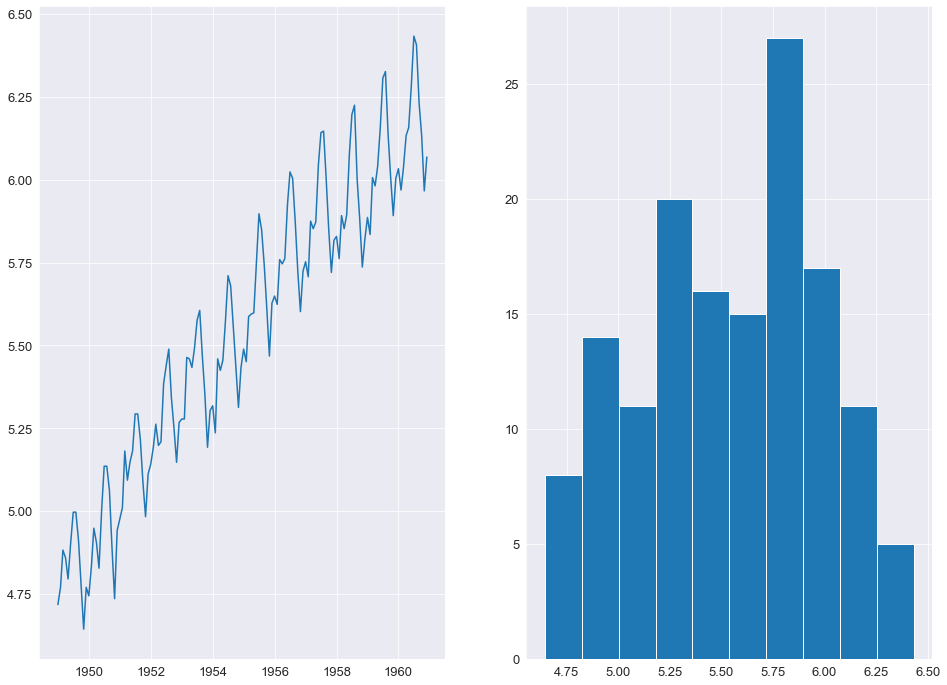

In [42]:
import numpy as np
X = np.log(series2)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%.2f, mean2=%.2f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f' % (var1, var2))

plt.figure()

ax1 = plt.subplot(121)
plt.plot(X)

ax2 = plt.subplot(122)
plt.hist(X)

Notese que este método puede ser fácilmente engañado, es mejor usar test estadísticos, tales como los de **Dickey-Fuller** o **Kwiatkowski-Phillips-Schmidt-Shin**. Statsmodels nos presenta una serie de test los cuales podemos aplicar a nuestra serie de tiempo. El objetivo de este test es aceptar la hipotesis nula (es decir, la serie de tiempo no es estacionaria) o rechazarla (aceptar la alternativa, lo que signfica que es estacionaria). Para interpretar estos resultados usaremos el valor-p.

- **p-value $>$ 0.05** se falla en rechazar la hipotesis nula, es decir, la serie de tiempo es no estacionaria
- **p-value $\leq$ 0.05** rechazar la hipotesis nula, es decir, la serie de tiempo es estacionaria

Hagamos el analisis para las tres series que vimos

In [43]:
from statsmodels.tsa.stattools import adfuller

result_births = adfuller(series1)
result_passenger = adfuller(series2)
result_logPassenger = adfuller(np.log(series2))


print('ADF Statistic for birth dataset: %f' % result_births[0])
print('p-value: %f' % result_births[1])
print('Critical Values:')
for key, value in result_births[4].items():
    print('\t%s: %.3f' % (key, value))
    
print('ADF Statistic for passenger dataset: %f' % result_passenger[0])
print('p-value: %f' % result_passenger[1])
print('Critical Values:')
for key, value in result_passenger[4].items():
    print('\t%s: %.3f' % (key, value))
    
print('ADF Statistic for log passenger dataset: %f' % result_logPassenger[0])
print('p-value: %f' % result_logPassenger[1])
print('Critical Values:')
for key, value in result_logPassenger[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for birth dataset: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
ADF Statistic for passenger dataset: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
ADF Statistic for log passenger dataset: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Notese que para el primer dataset, el valor es muy inferior al umbral por lo que se rechaza la hipotesis nula, es decir, es estacionaria. Las otras dos series de tiempo son no estacionarias.

## Algunos conceptos antes de hacer pronósticos

Para saber que tan bueno es un modelo o no, necesitamos tener claro una metodologia para hacerlo, sobretodo si se trata de modelación basado en datos. Adicionalmente, asumamos que un modelo se comporta bien, no se podrá deteriorar en el tiempo?

Cuando tratamos de ajustar un modelo a los datos, no solo es importante cuantificar como se comporta con esos datos, sino también como se comporta ante datos que no ha visto anteriormente. Cuando trabajamos en series de tiempo, la evaluación de estos modelos se llama **backtesting**. PAra realizar este procedimiento es importante:

- Dividir el conjunto de datos en Entreamiento-Testeo que respeten el orden temporal de las observaciones
- Realizar en lo posible múltiples divisiones que respeten el orden temporal
- Validación hacia adelante, en donde el modelo se pudiera actualizar cada vez que recibe nuevos datos.


In [66]:
import pandas as pd
series1 = pd.read_csv('./data/daily-total-female-births.csv', 
                     header = 0, 
                     index_col = 0, 
                     parse_dates = True).squeeze("columns")

train_size = int(len(series1) * 0.80)
train, test = series1[0:train_size], series1[train_size:len(series1)]
print('Observations: %d' % (len(series1)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 365
Training Observations: 292
Testing Observations: 73


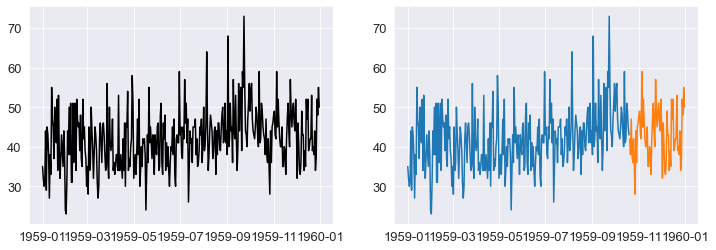

In [45]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12, 4))

ax1 = plt.subplot(121)
plt.plot(series1,'k')

ax2 = plt.subplot(122)
plt.plot(train)
plt.plot(test)

Finalmente es importante saber como cuantificar el error del modelo con respecto a los datos obtenidos. Las tres formas más usadas son:

- **Error absoluto medio (MAE)**: es calculado como el promedio del valor absoluto de los errores en cada punto
- **Error cuadrático medio (MSE)**: es calculado como el promedio de los errores elevados al cuadrado
- **Raiz cuadrada del error cuadrático medio (RMSE)**: la raiz cuadrada del MSE

In [46]:
import numpy as np

expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

MAE = np.mean(np.abs(np.array(expected)-np.array(predictions)))
MSE = np.mean((np.array(expected)-np.array(predictions))**2)
RMSE = np.sqrt(np.mean((np.array(expected)-np.array(predictions))**2))

print('MAE: %7.4f' % MAE)
print('MSE: %7.4f' % MSE)
print('RMSE: %5.4f' % RMSE)

MAE:  0.1400
MSE:  0.0220
RMSE: 0.1483


Veremos más adelante que la libreria para machine learning nos presentan estas funciones.

## Métodos de Box Jenkins

El objetivo de esta metodologia es la de encontrar el mejor modelo para hacer pronóstico en series de tiempo basado en modelos autoregresivos de media movil (**ARMA**) si es estacionario o modelos autoregresivos integrados de media movil (**ARIMA**) si no son estacionarios. Cada componente de estos modelos esta definida como:

- **AR**: autoregresión. Es aquel modelo que usa un relación dependiente entre la observación actual y alguna cantidad de observaciones retrasadas.
- **I**: integración. Es aquel modelo que usa la diferenciación entre las observaciones con el objetivo de volverla en estacionaria
- **MA**: media móvil: Es aquel modelo que usa la dependencia entre las diferentes observaciones y los errores residuales de un modelo medio móvil aplicado a variables retrasadas. 

Estas tres componentes estan definidas explicitamente en el modelo **ARIMA(p,d,q)**
- **p**: el número de observaciones retrasadas incluidas en el modelo
- **d**: el número de veces que las observaciones son diferenciadas
- **q**: el tamaño de la ventana media móvil. 

### Autocorrelación

Ya que los modeos de autoregresión asumen que la observación siguiente dependen de cierta forma de las anteriores, entonces es importante analizar la correlación de la señal. Si las dos señales cambian en la misma dirección, entonces es una correlación positiva, sino sería negativa. 

Text(0, 0.5, 'y(t+1)')

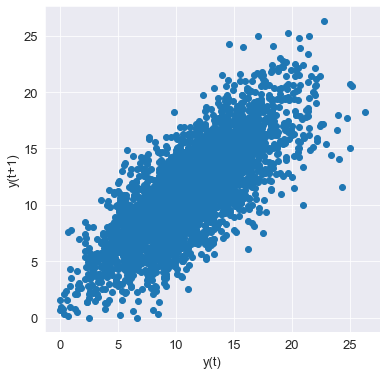

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

series_temperatura = pd.read_csv('./data/daily-minimum-temperatures.csv',
                                header = 0,
                                index_col = 0,
                                parse_dates = True).squeeze("columns")

plt.figure(figsize=(6,6))
plt.scatter(series_temperatura[0:-1],series_temperatura[1:])
plt.xlabel('y(t)')
plt.ylabel('y(t+1)')

Notese que se muestra una correlación entre ambas variables. Un test estadísticos que podría usar es el coeficiente de **correlación de Pearson** el cual indica +1 correlacionado positivamente y -1 correlacionado negativamente. Valores muy cercanos a cero significan baja correlación

In [48]:
import pandas as pd

dataframe = pd.DataFrame()
max_lagg = 5
for i in range(max_lagg):
    column_name = 't+' + str(i)
    dataframe[column_name] = series_temperatura.shift(max_lagg-1-i)

dataframe.corr()

,t+0,t+1,t+2,t+3,t+4
t+0,1.000000,0.774857,0.631051,0.586346,0.578898
t+1,0.774857,1.000000,0.774878,0.631095,0.586375
t+2,0.631051,0.774878,1.000000,0.774886,0.631119
t+3,0.586346,0.631095,0.774886,1.000000,0.774870
t+4,0.578898,0.586375,0.631119,0.774870,1.000000


En aras de hacer mas eficiente este procedimiento, Pandas crea un función que gráfica la autocorrelación de la señal el cual incluye un intervalo de confianza del 95% y 99%.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

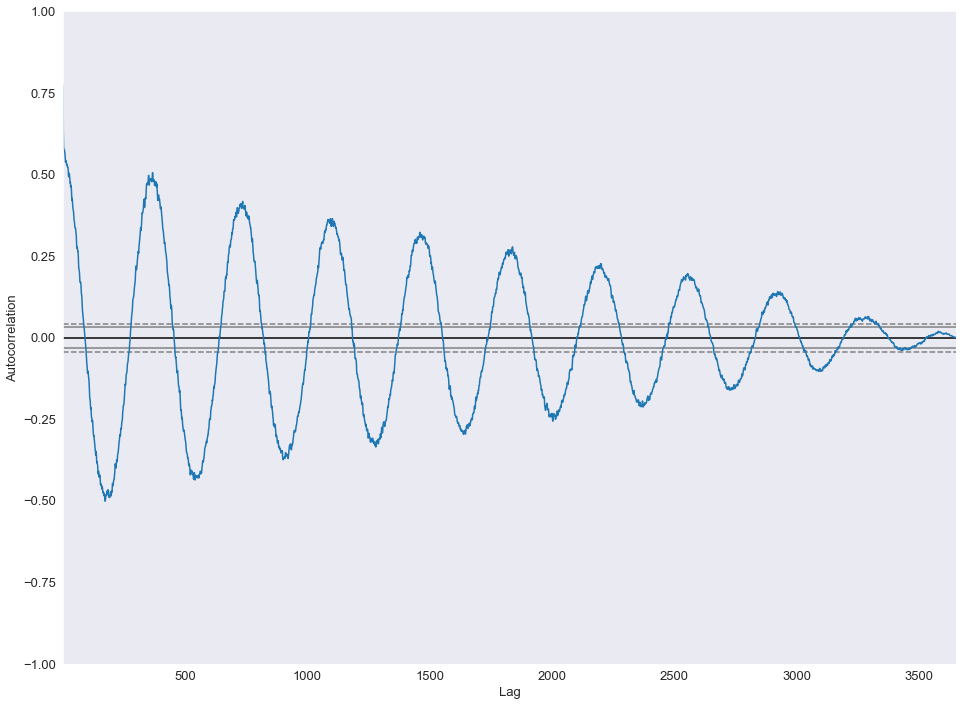

In [49]:
pd.plotting.autocorrelation_plot(series_temperatura)

Statsmodels también nos incluye un método para realizar este tipo de gráficas

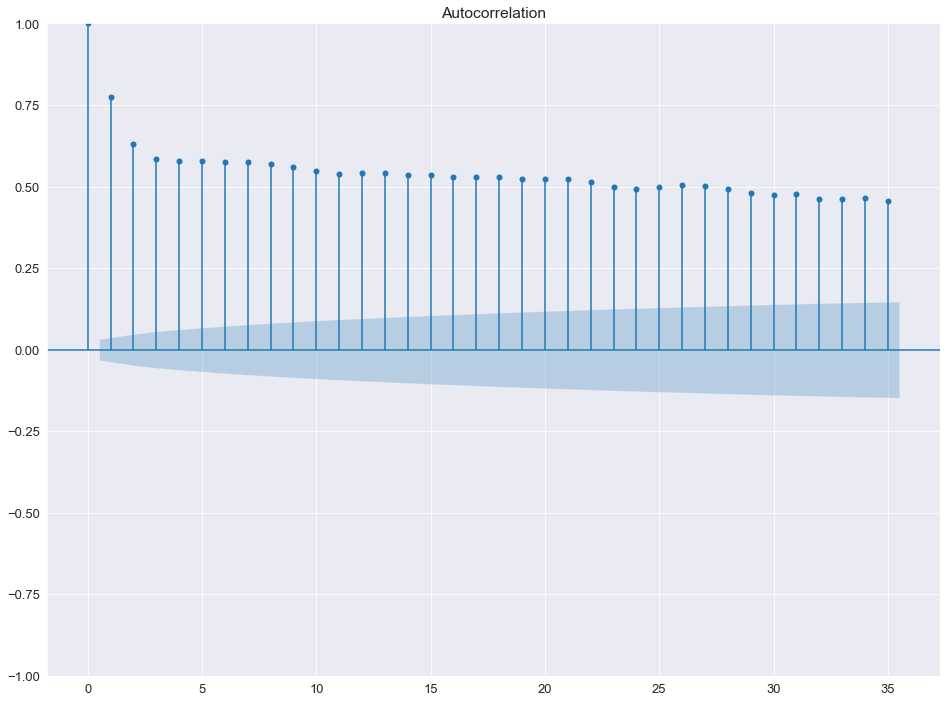

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series_temperatura, lags=35);

### Modelo de autoregresión (AR)

Recuerde que un modelo de autoregresion AR($p$) esta definido como

$$x_t = \alpha_1 x_{t-1} + \alpha_2 x_{t-2} + ... + \alpha_p x_{t-p} + w_t$$

Tratemos de obtener nuestro primer modelo de autoregresion. Antes de eso es importante tener un modelo de linea base para comparar los resultados. El modeo más simple que se puede trabajar, es decir, que la temperatura siguiente es igual a la del día anterior. Implementemos esto

Test RMSE: 1.850


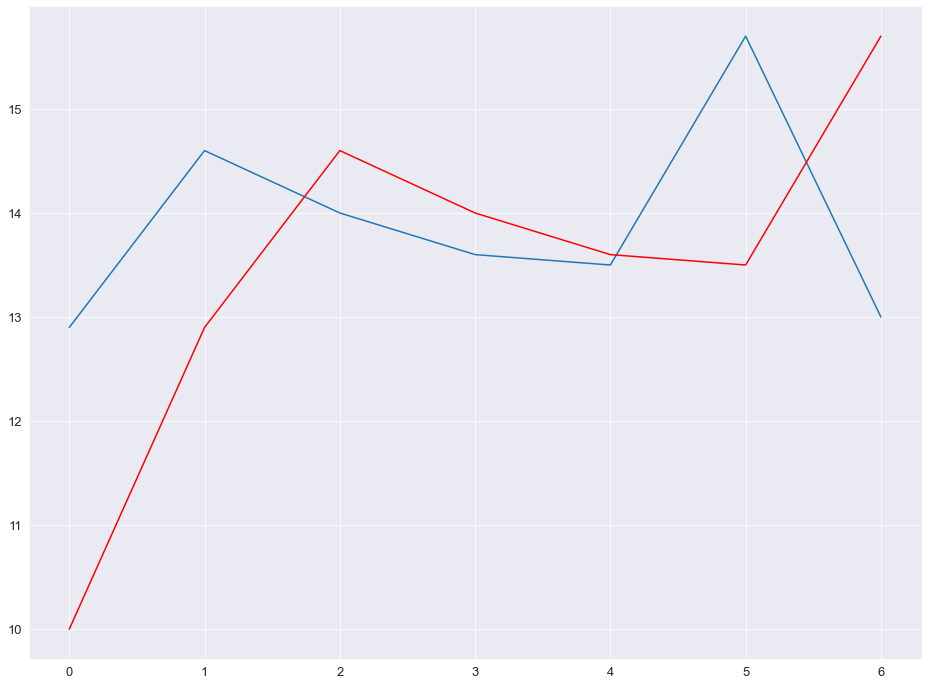

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('./data/daily-minimum-temperatures.csv',
                    header = 0, 
                    index_col = 0,
                    parse_dates = True).squeeze("columns")

# create lagged dataset
dataframe = pd.concat([series.shift(1), series], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
    
    
rmse = np.sqrt(np.mean((np.array(test_y)-np.array(predictions))**2))
print('Test RMSE: %.3f' % rmse)

# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')

Ahora intentemos encontrar un modelo de autoregresión

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


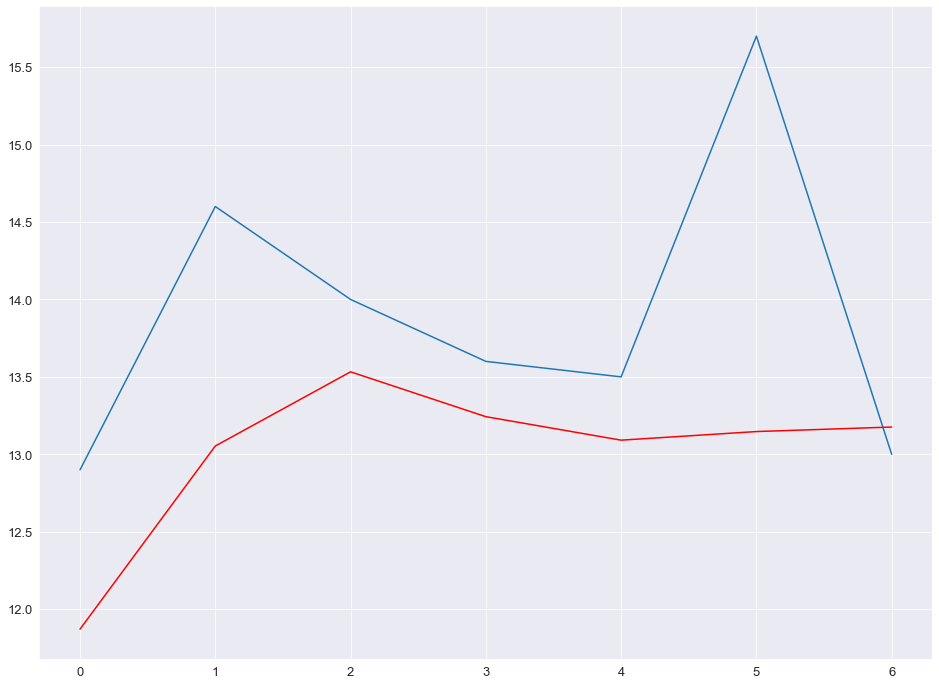

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# load dataset
series = pd.read_csv('./data/daily-minimum-temperatures.csv',
                    header = 0, 
                    index_col = 0,
                    parse_dates = True).squeeze("columns")

# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AutoReg(train, lags = 29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(np.mean((np.array(test_y)-np.array(predictions))**2))
print('Test RMSE: %.3f' % rmse)

# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')

### ARIMA

a continuación miraremos como es la clase u objeto para realizar estimaciones de modelo usando ARIMA. Para lo anterior utilizaremos el dataset de ventas de shampoo

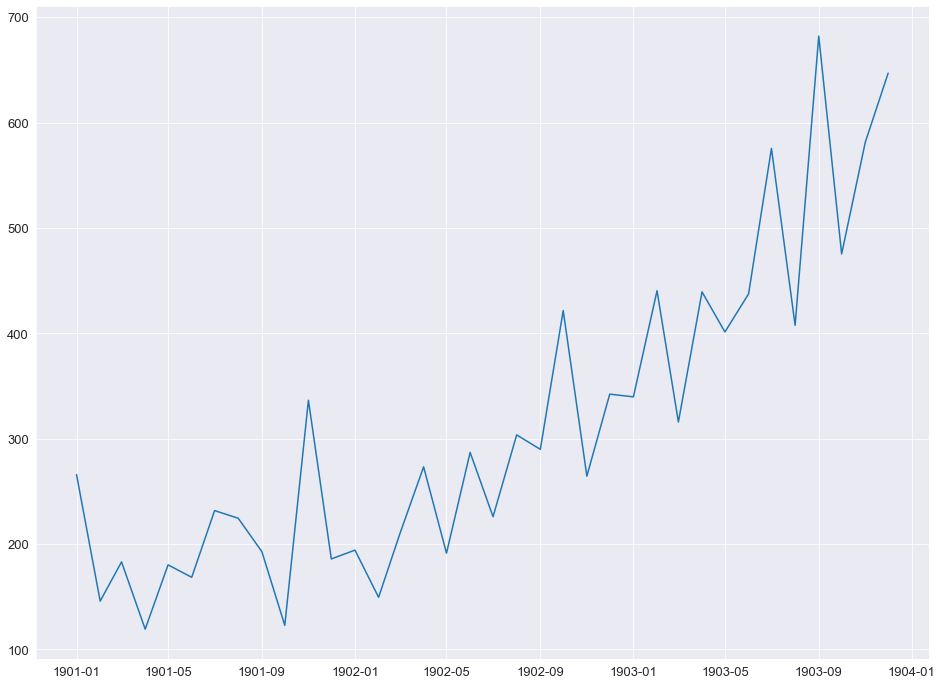

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('./data/shampoo_sales.csv', 
                     header=0, 
                     index_col=0, 
                     parse_dates=True, 
                     date_parser=parser).squeeze("columns")

plt.plot(series)

In [74]:
series = pd.read_csv('./data/shampoo_sales.csv', 
                     header=0, 
                     index_col=0, 
                     parse_dates=True,
                     date_parser=parser).squeeze("columns")

Notese que la serie de tiempo tiene una tendencia, por lo que sugiere que no es estacionaria y habrá que aplicar diferenciación. Miremos la gráfica de autocorrelación

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

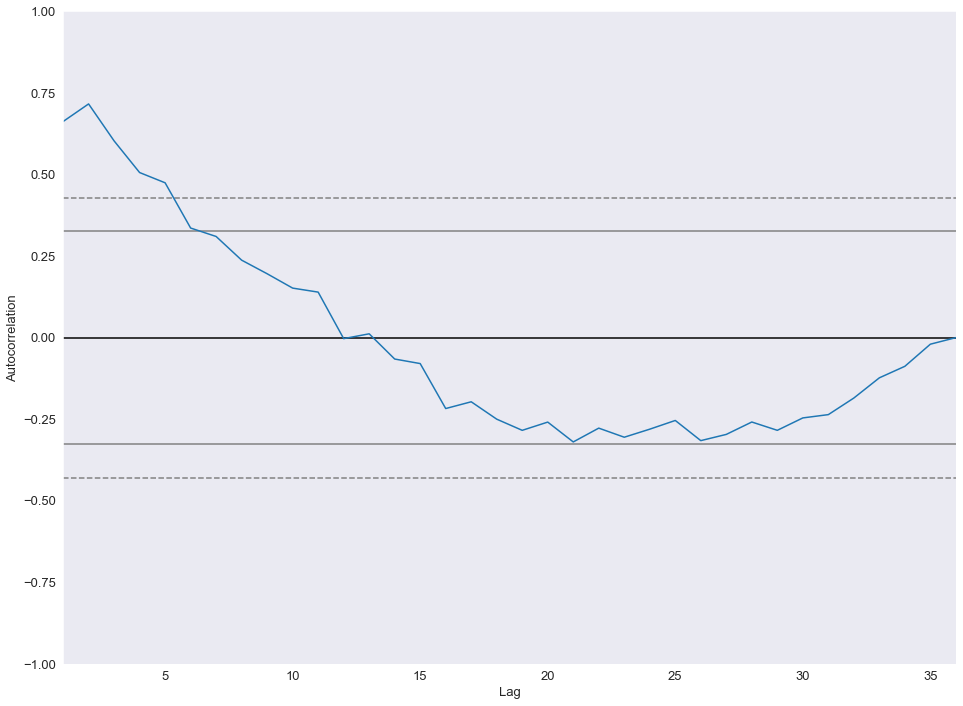

In [55]:
pd.plotting.autocorrelation_plot(series)

Notese que hay una correlación significativa positva de los primeros 5 lags. Eso quiere decir que un bueno inicio para AR puede ser de 5. Teniendo en cuenta esto, y sabiendo que una buena opción es realizar al menos un primer grado de diferenciación por la tendencia procedamos a modelar usando ARIMA

Recuerde que los pasos para modelar son los siguientes:

- Cargue el dataset
- Divida su dataset en conjunto de entrenamiento y test
- Creo una instancia del objeto a trabajar, en este caso ARIMA()
- Llame al método fit para hacer el ajuste.
- Lllame al método predict para hacer las predicciones
- Obtengan alguna métrica de su modelo sobre los datos de test.

Test RMSE: 92.469


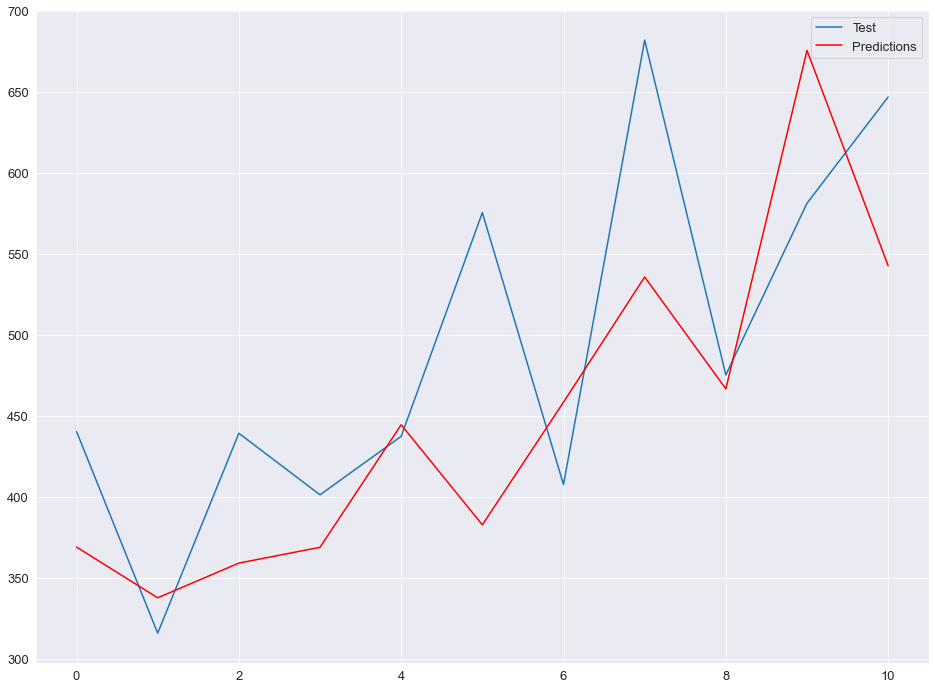

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# load dataset
series = pd.read_csv('./data/shampoo_sales.csv',
                    header = 0, 
                    index_col = 0,
                    parse_dates = True).squeeze("columns")
# split dataset
X = series.values
size = int(len(X) * 0.70)
train, test = X[1:size], X[size:]
train_history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(train_history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()[0]
    predictions.append(output)
    train_history.append(test[t])

#print(model_fit.summary())

# Evaluation metric
rmse = np.sqrt(np.mean((np.array(test)-np.array(predictions))**2))
print('Test RMSE: %.3f' % rmse)

# plot predictions vs expected
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['Test','Predictions'])

Notese que el modelo todavia puede ser ajustado algunos parámetros adicionales. Cómo podriamos hacer ajuste de hiperparámetros? Uno de los métodos mas utiizados es mediante un busqueda en grilla, en donde se evaluan diferentes parametros ajustables del modelo. Es importante entonces, tener claridad en la métrica a evaluar para diferenciar cual modelo se comporta mejor

### Grid Search

Como se mencionó anteriormente, el objetivo con este método es evaluar los diferentes parámetros de un modelo para saber cual es la mejor opción. En nuestro caso usaremos la raiz cuadrática del error cuadrático medio, y se realizará un un walk-forward cada vez que se tenga un dato. Primero creemos la función que evalue el modelo de ARIMA. Para realizar esta función, tendremos en cuenta los parámetros de recepción, en este caso, el dataset de entrenamiento y el orden del modelo de ARIMA

In [57]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(endog = history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
    # calculate out-of-sample error
    rmse = np.sqrt(np.mean((np.array(test)-np.array(predictions))**2))
    return rmse

Con esta función en mente, ya solo nos queda crear una función que recorra un conjunto de parámetros y nos evalue el modelo.

In [58]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

Ahora con estas dos funciones, podremos evaluar los modelos y encontrar la mejor combinación de parámetros

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# load dataset
series = pd.read_csv('./data/shampoo_sales.csv',
                    header = 0, 
                    index_col = 0,
                    parse_dates = True).squeeze("columns")

# Ignore warnings in training
import warnings
warnings.filterwarnings("ignore")

# split dataset
X = series.values
size = int(len(X) * 0.90)
train, test = X[1:size], X[size:]

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=173.517
ARIMA(0, 0, 1) RMSE=150.824
ARIMA(0, 0, 2) RMSE=127.985
ARIMA(0, 1, 0) RMSE=112.396
ARIMA(0, 1, 1) RMSE=92.257
ARIMA(0, 1, 2) RMSE=71.350
ARIMA(0, 2, 0) RMSE=196.471
ARIMA(0, 2, 1) RMSE=114.257
ARIMA(0, 2, 2) RMSE=93.245
ARIMA(1, 0, 0) RMSE=127.663
ARIMA(1, 0, 1) RMSE=99.800
ARIMA(1, 0, 2) RMSE=79.342
ARIMA(1, 1, 0) RMSE=82.122
ARIMA(1, 1, 1) RMSE=84.315
ARIMA(1, 1, 2) RMSE=81.927
ARIMA(1, 2, 0) RMSE=120.109
ARIMA(1, 2, 1) RMSE=80.121
ARIMA(1, 2, 2) RMSE=82.769
ARIMA(2, 0, 0) RMSE=96.586
ARIMA(2, 0, 1) RMSE=91.455
ARIMA(2, 0, 2) RMSE=94.477
ARIMA(2, 1, 0) RMSE=82.529
ARIMA(2, 1, 1) RMSE=84.789
ARIMA(2, 1, 2) RMSE=80.898
ARIMA(2, 2, 0) RMSE=106.061
ARIMA(2, 2, 1) RMSE=77.053
ARIMA(2, 2, 2) RMSE=78.199
ARIMA(4, 0, 0) RMSE=92.103
ARIMA(4, 0, 1) RMSE=92.977
ARIMA(4, 0, 2) RMSE=90.510
ARIMA(4, 1, 0) RMSE=89.142
ARIMA(4, 1, 1) RMSE=81.695
ARIMA(4, 1, 2) RMSE=68.521
ARIMA(4, 2, 0) RMSE=87.565
ARIMA(4, 2, 1) RMSE=79.458
ARIMA(4, 2, 2) RMSE=77.195
ARIMA(6, 0, 0) RMSE

Conociendo la mejor combinación de parámetros, se procede a analizar como se comporta con respecto al test

Test RMSE: 95.846


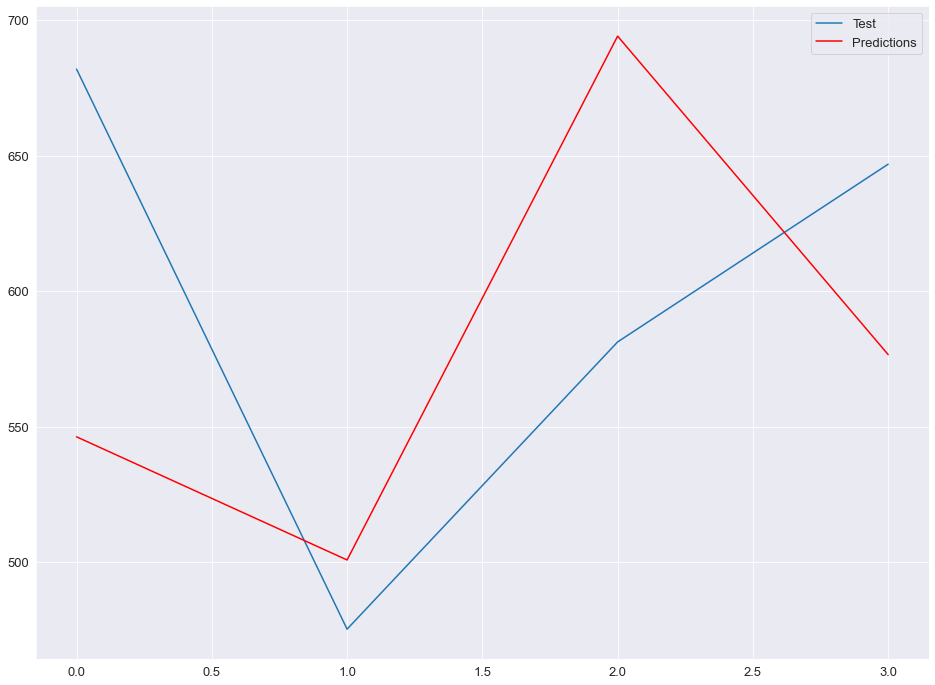

In [60]:
arima_order = (4, 1, 2)
predictions = list()
history = [x for x in train]

for t in range(len(test)):
    model = ARIMA(endog = history, order = arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
    
# Evaluation metric
rmse = np.sqrt(np.mean((np.array(test)-np.array(predictions))**2))
print('Test RMSE: %.3f' % rmse)

# plot predictions vs expected
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['Test','Predictions'])

Finalmente para guardar el modelo, basta con utilizar el método `save` y guardarlo con extensión pickle.

In [61]:
# save model to file
model_fit.save('./data/ARIMA_ShampooDataset.pkl')

### Finalizando ...

Entiendo un poco como funciona esta libreria y como se realiza el llamado a los diferentes métodos, ya puede explorar otras opciones tales como:
   
- Otros test estadísticos como KPSS, u otros modelos tales como SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous regressor model)
- También podrían explorar otras librerias que implementen estos modelos tales como darts.
- Realizar analisis de volatilidad, usando la libreria arch https://arch.readthedocs.io/en/latest/univariate/introduction.html
    

## Laboratorio

- ***Ejercicio 1.*** Consiga una base de datos correspondiente a los temas que usted trabaja a diario. Con lo visto en clase realice visualizaciones de la misma y responda preguntas propias en donde implique realizar operaciones de agrupación, agregaciones, entre otras. 


- ***Ejercicio 2.*** Proceda a descargarse el conjunto de datos temporales sobre el uso o conteo de bicicletas en el [Puente Fremont] de Seattle (http://www.openstreetmap.org/#map=17/47.64813/-122.34965). Estos datos provienen de un contador de bicicletas automatizado, instalado a fines de 2012, que tiene sensores inductivos en las aceras este y oeste del puente.

    Los recuentos de bicicletas por hora se pueden descargar de [link](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).
    
    Cargue el archivo a un dataframe y obtenga información util tal como: la distribución del tráfico de bicicletas en el día, o como se compara este con respecto a los fines de semana. 